# K Means Clustering with Online retail data.

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.<br><br>

For this notebook I am going to use a data set that I obatained from the UCI machine learning repository.

<br>http://archive.ics.uci.edu/ml/datasets/online+retail<br>

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

I have downloaded the file to my desktop and will load and edit the data set before use using Pandas.
<br><br>
The objective of this excerise is to create groups of customers based on the buying hehaviour that they have shown in the the file. In a real life examples this culstering could be used to group the clients into certain buckets which will need to have different Marketing stratagies applied. 
<br><br>
For clustering you need to numerical dimesions that the customer needs to be plotted against. In this case we will choose Quanity and Price of their yearly buying to allow the clustering to be used.


# Import neccessary packages

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Reading the data

Please note for this I have down loaded the data to my desktop. At present the data is at a transactional level - I will need to convert it to a summary data set. For example I want to show the the total spend and the number of items.

In [57]:
df = pd.read_csv('C:\Users\Glandore\Desktop\Github\Online Retail.csv')

Examine the data using the head command

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Ok so for this excerise we want to sum each customer by value of their annual purchses and the number of items to purchased. Let explore the data a bit more by determining how many customers there are in the data.

In [59]:
df.CustomerID.nunique()

4372

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


In [61]:
df.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Describe only looks at the numeric values and we can see that there is a short fall in the transaction numbers - this is showing that there is are a large number of transactions the do not have a customer number (over 100,000) these should be removed
We can do this by using the drop NA method in pandas.

In [62]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df =  df.dropna()  

OK so now we habve dropped the rows that have no customer numbers. Now we need to strip the columns out of the data that we dont need. We only need Customer Id, Quantity and Unit Price. We can use the pandas drop command for this.

In [10]:
df.drop(df.columns[[0,1,2, 4,7]], axis=1, inplace=True)

Lets check then data now....


In [11]:
df.head(5)

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0


Ok so there are there three columns we need. I want to reorder them so the customer ID is first. 

In [63]:
df = df[['CustomerID', 'Quantity', 'UnitPrice']]

Now we want to Pivot the Quanity and Unit price for each customer..We want to see the total sales and number of items ordered..for this we can can use Pandas Pivot just like in excel. 

In [13]:
data = pd.pivot_table(df,index=["CustomerID"])

I know from the earlier descrive method that there are negative values in the quanity column so I am assuming that these are refunds so i will remove this from the dataframe.
We can use pandas filtering for this. 

In [14]:
 data = data[(data > 0).all(1)]

Did this remove the neagative Quantities - lets check using the describe() method again

In [15]:
data.head()

,Quantity,UnitPrice
CustomerID,,
12347.0,13.505495,2.644011
12348.0,75.516129,5.764839
12349.0,8.643836,8.289041
12350.0,11.588235,3.841176
12352.0,4.947368,23.274737


Then we can look at the data by plotting it on a scatter plot to see the distribution of the data.


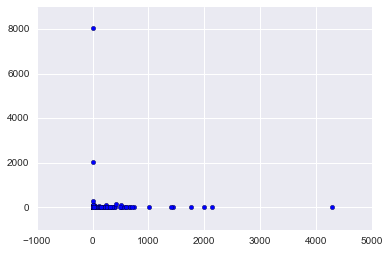

In [19]:
plt.scatter(data["Quantity"],data["UnitPrice"])

From this chart we can see that there some significant outliers that are affecting the overall charting. For the purposes of clustering we should remove these from the data set. Using the describe() method again we can the numeric values of these outliers.


In [20]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,406829.000000,406829.000000
mean,15287.690570,12.061303,3.460471
std,1713.600303,248.693370,69.315162
min,12346.000000,-80995.000000,0.000000
25%,13953.000000,2.000000,1.250000
50%,15152.000000,5.000000,1.950000
75%,16791.000000,12.000000,3.750000
max,18287.000000,80995.000000,38970.000000


If we look at the Max column values for Quantity and Unitprice we can clearly see our outliers. We can do this easily address this by using pandas filtering. Since this online store is doing a large numbers of very small trasactions we want to be quite severe in the setting of the filtering limits.  Let us remeber that there is over 400,000 transactions in this data set still. <br><br>
I have chosen to limit the data to:<br>
<ul>
<li>Orders under 100 in quanity</li>
<li>Orders where the unit price is under 20</li>
</ul>

In [72]:
Filter_data = data[((  data['Quantity'] < 100) & (data['UnitPrice'] < 20))]

In [73]:
Filter_data.describe()

,Quantity,UnitPrice
count,4195.000000,4195.000000
mean,12.122127,3.312730
std,11.723290,1.799013
min,0.090909,0.290000
25%,5.589992,2.245299
50%,9.442748,2.948308
75%,13.661905,3.865458
max,99.676923,19.950000


Lets use the scatter plot again to examine the data now...

(0, 20)

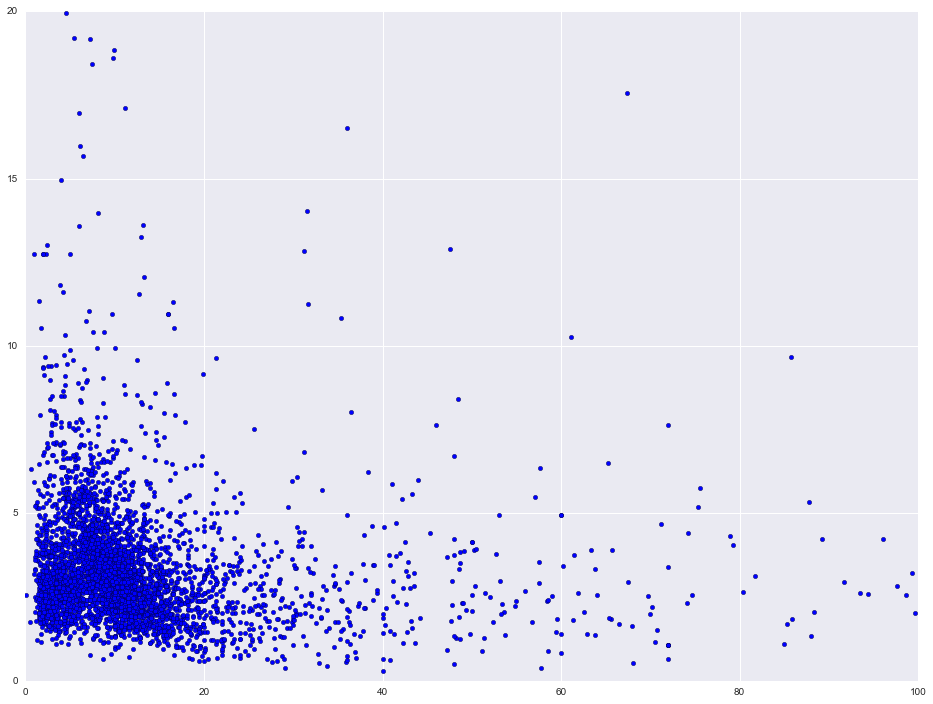

In [74]:
plt.figure(figsize=(16,12))
plt.scatter(Filter_data["Quantity"],Filter_data["UnitPrice"])
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,20])

# Starting the K-Means Clustering

Lets do our clustering. Start by importing the KMeans from Sklearn. Scale allows the data to be normalized - this is important for accurate results.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

So how many Clusters do we want to create? Let say 5 for this example. 

In [ ]:
model = KMeans(n_clusters=5)

We need to apply the Sklearn scale function to the data - basically evening everything out on each axis. More details can be found <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale">here.</a> 

In [ ]:
# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(Filter_data))

So that is the model created and the data placed into the 5 clusters - now all we have to do is plot the data.

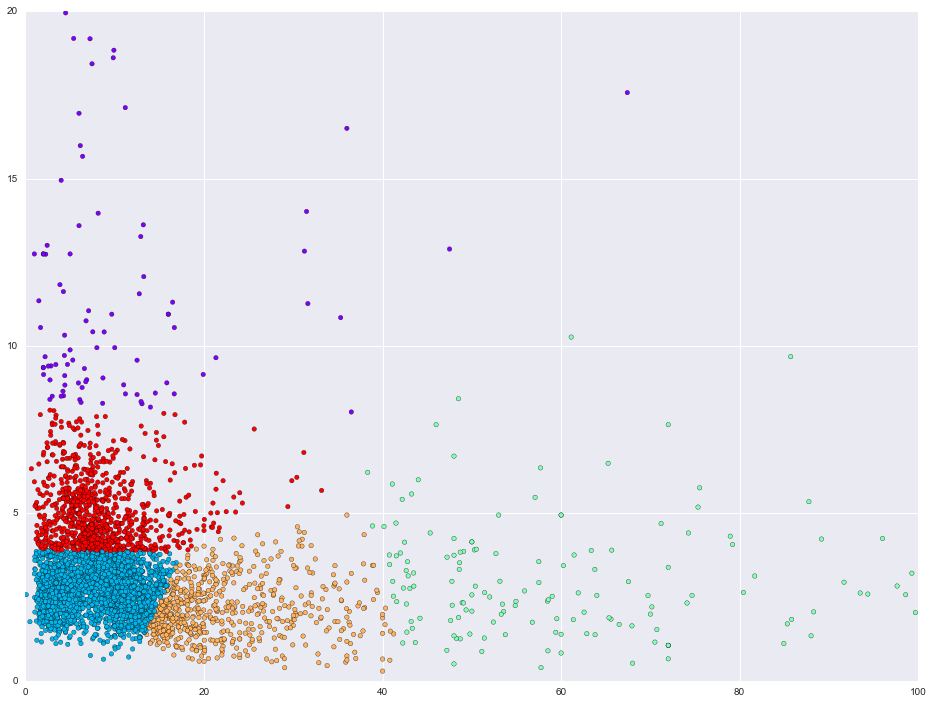

In [75]:
plt.figure(figsize=(16,12))
plt.scatter(Filter_data["Quantity"],Filter_data["UnitPrice"], c=model.labels_.astype(float),cmap='rainbow')

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,20])
plt.show()

# But how does this help me in the real world? 

So if are faced with a new value how can we use K-Means to decide what group to assign it to?

In [93]:
new = pd.read_csv("C:\Users\Glandore\Desktop\Github\New_data.csv")
new.head()

,CustomerID,Quantity,UnitPrice
0,24234,22,3
1,23423,23,5
2,5444,55,6
3,434,2,3
4,23423,3,8


In [ ]:
model.fit(new)
predict=model.predict(new)

In [87]:
predict

array([3, 1, 0, 2, 4])

In [97]:
new['Classfication'] = predict

So basically what we are doing here is using the exstsitering clustering model to "Fit" new value that have come in the file.

In [100]:
new

,CustomerID,Quantity,UnitPrice,NEW_COLUMN,Classfication
0,24234,22,3,3,3
1,23423,23,5,4,4
2,5444,55,6,0,0
3,434,2,3,2,2
4,23423,3,8,1,1
